<a href="https://colab.research.google.com/github/peeyushsinghal/CNN/blob/master/CNN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring to create CNN through basic libraries

Architecture : Input Layer -> Conv Layer 1 -> Relu 1 -> Conv Layer 2 -> Relu 2 -> Maxpool layer -> Dense (Fully Connected) Layer -> Ouput

1. Importing Libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt # for showing images
import tensorflow as tf # only for importing keras dataset
import random # for generating random number (image index)




2. Getting data : Importing the dataset - MNIST hand written digits https://keras.io/api/datasets/mnist/. 

In [35]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
# Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test)
#x_train: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).
#y_train: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,)

In [36]:
# Checking the downloaded data
x_train.shape
# around 60000 images

(60000, 28, 28)

Label:  3


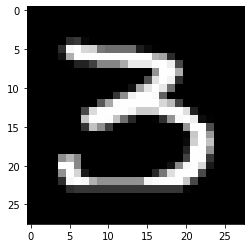

In [37]:
# visualizing the data
n = random.randint(0,x_train.shape[0]-1)# generated a random integer between 0 and image index
img = x_train[n].reshape((28, 28)) # using the index, get the image reshaped to 28, 28, [ understood by stackoverflow comments]
label = y_train[n] # the label for the corresponding index
print("Label: ",label)
plt.imshow(img, cmap='gray')
plt.show()

3. Normalizing Data

In [38]:
# normalising the image data set
def normalise_data(data):
  data=data.reshape(data.shape[0],28,28,1).astype('float32') # creating tensor by reshaping Image_set_size, 28, 28, 1
  data= (data-int(np.mean(data)))/(int(np.std(data)))  # Normalize the images using standard normalization

In [39]:
# normalising training data
x_train = normalise_data(x_train)

4. Hyperparameters

In [42]:
#Hyperparameters

NUM_OUTPUT = 10 # output data
LEARNING_RATE = 0.01	#learning rate
IMG_WIDTH = 28 # image width
IMG_DEPTH = 1
FILTER_SIZE=5 # assuming a square filter
NUM_FILT1 = 8 # number of filters in layer 1
NUM_FILT2 = 8 # number of filters in layer 2
BATCH_SIZE = 20
NUM_EPOCHS = 2	 # number of iterations
MU = 0.95

PICKLE_FILE = 'output.pickle'
# PICKLE_FILE = 'trained.pickle'

5. Initializing parameters

In [40]:
filter_1 ={} # weights of filters of layer 1
filter_2 ={} # weights of filters of layer 2
bias_1 ={} # bias of filter of layer 1
bias_2 ={} # bias of filter of layer 2

In [51]:
#initializes layer with filter weights for each filter and bias
def init_layer(num_filter,filter_size=FILTER_SIZE,img_depth = IMG_DEPTH):
  list_filter = list()
  for i in range(0,num_filter):
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None)
    filter = initializer(shape=(filter_size,filter_size))
    list_filter.append(filter)
  bias=0
  return list_filter,bias

In [56]:
# initializing layer 1
filter_1,bias_1 = init_layer(NUM_FILT1)

In [57]:
# initializing layer 2
filter_2, bias_2 = init_layer(NUM_FILT2)